# Web Scraping Netflix Stock Data Using BeautifulSoup

In [1]:
# Installing necessary libraries
!pip install bs4
!pip install html5lib
!pip install lxml

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
# importing packages
import pandas as pd 
from bs4 import BeautifulSoup
import requests

In [3]:
# URL to extract stock data from
url = "https://www.macrotrends.net/stocks/charts/NFLX/netflix/stock-price-history"

In [4]:
data = requests.get(url).text
print(data)


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/NFLX/netflix/stock-price-history" />
		<title>Netflix - Stock Price History | NFLX  | MacroTrends</title>
		<link rel="icon" type="image/x-icon" href="/assets/images/icons/FAVICON/macrotrends-favicon.ico">
		<meta name="description" content="Historical daily share price chart and data for Netflix since 2023 adjusted for splits.  The latest closing stock price for Netflix as of May 11, 2023 is &lt;strong&gt;344.76&lt;/strong&gt;. 
							
		&lt;ul style='margin-top:10px;'&gt;
		&lt;li&gt;The all-time high Netflix stock 

In [5]:
# Creating BeautifulSoup object
soup = BeautifulSoup(data, "html.parser")

In [6]:
netflix_data = pd.DataFrame(columns=["Year", "Average Price", "Open", "High", "Low", "Close", "Annual Change(%)"])

## Scraping Netflix data from 2002 to 2022

In [7]:
# First we isolate the body of the table which contains all the information
# Then we loop through each row and find all the column values for each row
for row in soup.find("tbody").find_all("tr"):
    col = row.find_all("td")
    year = col[0].text
    avg_price = col[1].text
    Open = col[2].text
    high = col[3].text
    low = col[4].text
    close = col[5].text
    annual_change = col[6].text
    
    data_row = {"Year":int(year), "Average Price":float(avg_price), "Open":float(Open), "High":float(high), "Low":float(low), "Close":float(close), "Annual Change(%)":float(annual_change.rstrip("%"))}
    
    # Finally we concate the data of each row to the table
    netflix_data = pd.concat([netflix_data,pd.DataFrame([data_row])], ignore_index=True)

netflix_data.head()

,Year,Average Price,Open,High,Low,Close,Annual Change(%)
0,2022,284.6392,597.37,597.37,166.37,294.88,-51.05
1,2021,558.2177,522.86,691.69,484.98,602.44,11.41
2,2020,446.8272,329.81,556.55,298.84,540.73,67.11
3,2019,328.8713,267.66,385.03,254.59,323.57,20.89
4,2018,319.2903,201.07,418.97,201.07,267.66,39.44


<Axes: xlabel='Year'>

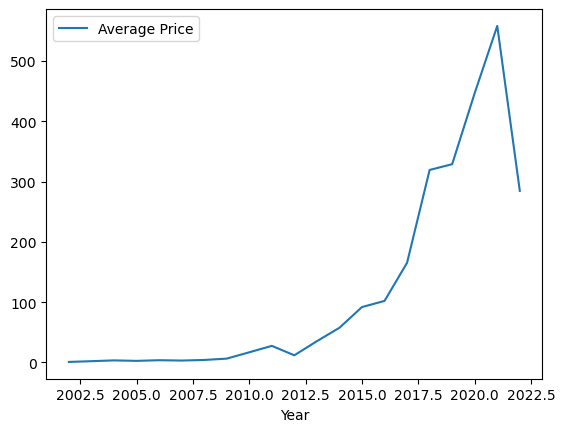

In [8]:
# Average Price trend of Netflix over the years

netflix_data.plot(x="Year", y="Average Price")

<Axes: xlabel='Year'>

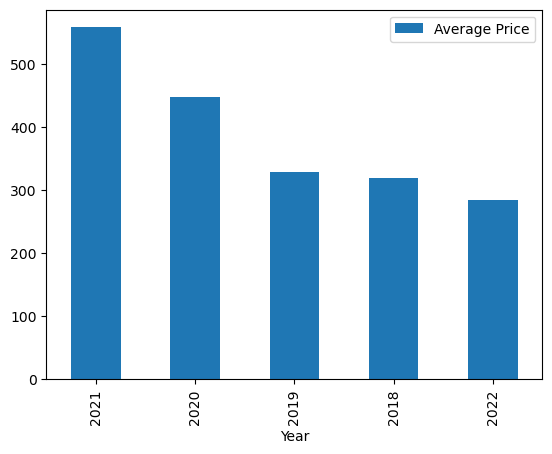

In [9]:
# 5 Highest Average Price of Netflix

top5 = netflix_data.nlargest(5, "Average Price")
top5.plot.bar(x="Year", y="Average Price")
